In [1]:
import requests

/Users/imtk/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
import sys
sys.path.append('..')

In [3]:
from utils import dump_jsonl, load_jsonl

In [4]:
def get_hashtags(date, hour=9):
    resp = requests.get(f"https://api.exportdata.io/trends/locations/th?date={date}&hour={hour}")
    return resp.json()

In [5]:
# dump_jsonl(twitterTrands, "twitter_trends.jsonl")

In [7]:
twitterTrands = load_jsonl("./raw_data/twitter_trends.jsonl")

Loaded 365 records from ./raw_data/twitter_trends.jsonl


In [8]:
from collections import defaultdict

allTrends = defaultdict(list)
cntTweets = defaultdict(int)
for d in twitterTrands:
    for trend in d["trends"]:
        if trend["tweet_volume"] is None:
            continue
            
        allTrends[trend["name"]].append(d["date"])
        cntTweets[trend["name"]] += trend["tweet_volume"]


In [9]:
from datetime import datetime

trendTime = {}
duration = []
for trend in allTrends:
    mn, mx = min(allTrends[trend]), max(allTrends[trend])
    delta = datetime.strptime(mx, "%Y-%m-%d") - datetime.strptime(mn, "%Y-%m-%d")
    trendTime[trend] = {
        "min": mn,
        "max": mx,
        "duration": delta.days,
        "len": len(allTrends[trend])
    }
    
    duration.append(delta.days)

In [10]:
# import pandas as pd
# pd.set_option('display.float_format', lambda x: '%.5f' % x)
# df_describe = pd.DataFrame([cntTweets[t]/trendTime[t]["duration"] for t in cntTweets if trendTime[t]["duration"]>0])
# df_describe.describe()

In [11]:
# import pandas as pd

# df_describe = pd.DataFrame([d for d in duration if d>0])
# df_describe.describe()

In [12]:
# import matplotlib.pyplot as plt
# import numpy as np

# _ = plt.hist([d for d in duration if d>0], bins=100)  # arguments are passed to np.histogram
# plt.title("Histogram with 'auto' bins")
# plt.show()

In [13]:
hashtags = []
for trend in trendTime:
    if trendTime[trend]["duration"] >= 2 and trendTime[trend]["duration"] < 78 and trend[0].startswith("#"):
        if cntTweets[trend]/trendTime[trend]["len"] > 60000:
#         if trendTime[trend]["len"] > 0.4*trendTime[trend]["duration"]:
#             print(trend)
            hashtags.append((trend, trendTime[trend]["duration"], cntTweets[trend]/trendTime[trend]["len"]))
len(hashtags)

251

In [14]:
hashtags[0:10]

[('#TPOPConcertFest', 2, 278266.0),
 ('#BrightWinConcert', 12, 184730.5),
 ('#TheAstronaut', 10, 1782238.3333333333),
 ('#TEN_Birthday', 6, 715178.6666666666),
 ('#ENGFA_FinalMGI2022', 2, 270531.6666666667),
 ('#TXTinBKK', 51, 111095.0),
 ('#TurnOffTheAlarm', 5, 170127.66666666666),
 ('#หยุดผูกขาดมือถือ', 9, 122743.0),
 ('#โตโน่', 14, 206175.0),
 ('#เกรซซี่', 2, 229004.33333333334)]

In [15]:
# https://stackoverflow.com/questions/65398427/retrieving-specific-conversations-using-tweepy

In [20]:
# !pip install tweepy

In [21]:
import tweepy

consumer_key = "*"
consumer_secret = "*"
bearer_token = "*"
access_token = "*"
access_token_secret = "*"

In [18]:
# client = tweepy.Client(bearer_token, wait_on_rate_limit=True)

In [23]:
# mkdir tweets

In [19]:
# idx = 54
# hashtag, _, _ = hashtags[idx]
# tweets = get_tweets_from_hashtag(hashtag)
# dump_jsonl(tweets, f"tweets/twitter_trends_{idx}.jsonl")

## Check Tweets Quality in Each Trend

In [24]:
from pythainlp.util import *
import re

def norm(text):
    return ' '.join(re.sub("(@[A-Za-z0-9_]+)|(#[A-Za-z0-9_]+)|(\w+:\/\/\S+)"," ", text).split())

df = []
for (idx, h) in enumerate(hashtags):
    hashtag,_,_ = h
    tweets = load_jsonl(f"tweets_v1/twitter_trends_{idx}.jsonl", verbose=False)
    
    th = []
    l = []
    for tweet in tweets[1:]:
        text = tweet["data"]["text"]
        text = norm(text)
        th.append(countthai(text))
        l.append(len(text))
        
#         if countthai(text) < 80:
#             print(countthai(text), text)
    df.append({
        "hashtag": hashtag,
        "thai": sum(th)/len(th),
        "length": sum(l)/len(l),
    })

In [ ]:
import pandas as pd 
df = pd.DataFrame(df).sort_values(by="thai", ascending=False)

In [ ]:
print("More Thai")
n = 20
pd.set_option("max_rows", n)
df.head(n)

## Hashtag with less Thainess

Ignore them; they are mostly related to K-Pop stars.

In [23]:
df.tail(20)

,hashtag,thai,length
98,#YOUNGJAE_SUGAR,76.085798,34.187500
36,#BurberryxBright,75.342724,86.404040
18,#안녕BANGKOK,74.461971,125.848485
160,#วอร์คราฟLV7xZP,74.379534,103.646465
119,#GOT7_NANANA,74.365080,38.494949
132,#IGOT7,73.504301,49.212121
27,#theothersidetour,72.680507,77.151515
234,#treasure,72.601668,102.438776
111,#NCTDREAM_Beatbox,71.856087,29.727273
44,#NYFW,70.817138,49.717172


In [24]:
hashtags = []
for idx, row in df[df["thai"] > 95].iterrows():
    if countthai(row["hashtag"]) < 20:
        continue
    hashtags.append((row["hashtag"], idx))

In [25]:
len(hashtags)

53

# Get tweets v2

In [25]:
from tqdm import tqdm

# Operations: https://developer.twitter.com/en/docs/twitter-api/enterprise/rules-and-filtering/operators-by-product
def get_tweets_from_hashtag(hashtag):
    query = f"{hashtag} -is:retweet -is:quote lang:th is:reply"
    start_time = trendTime[hashtag]["min"]+"T00:00:00Z"
    end_time = trendTime[hashtag]["max"]+"T23:59:59Z"
    max_results = 100
    fields = "conversation_id,created_at,author_id"
    resp = client.search_all_tweets(query=query, max_results=max_results, start_time=start_time, end_time=end_time,tweet_fields=fields)
    next_token = resp.meta["next_token"] if "next_token" in resp.meta else None

    
    tweets = [{"next_token": next_token, "hashtag": hashtag}]
    for tweet in resp.data:
        tweets.append({
            "data": tweet.data
        })
    return tweets

In [26]:
# for hashtag, idx in tqdm(hashtags, total=len(hashtags)):
#     tweets = get_tweets_from_hashtag(hashtag)
#     dump_jsonl(tweets, f"tweets_v2/twitter_trends_{idx}.jsonl")

## Load Tweets Conversations

In [27]:
cids = defaultdict(list)

for hashtag, idx in hashtags:
    tweets = load_jsonl(f"tweets_v2/twitter_trends_{idx}.jsonl", verbose=False)
    assert(hashtag==tweets[0]["hashtag"])

    for tweet in tweets[1:]:
        cid = tweet["data"]["conversation_id"]
        cids[cid].append((hashtag, idx, tweet["data"]["created_at"]))

In [28]:
# Operations: https://developer.twitter.com/en/docs/twitter-api/enterprise/rules-and-filtering/operators-by-product
import time

def add_tweets(arr, resp):
    if resp.meta["result_count"]==0:
        return arr
    
    for tweet in resp.data:
        arr.append(tweet.data)
    return arr

def get_tweets_in_conversation(conversation_id, query_time):
    query = f"conversation_id:{conversation_id}"
    start_time = (query_time-timedelta(days=2)).strftime("%Y-%m-%d")+"T00:00:00Z"
    end_time = (query_time+timedelta(days=28)).strftime("%Y-%m-%d")+"T23:59:59Z"

    max_results = 100
    fields = "conversation_id,author_id,context_annotations,in_reply_to_user_id,referenced_tweets,created_at"

    next_token = None
    resp = client.search_all_tweets(query=query, max_results=max_results, start_time=start_time, end_time=end_time,tweet_fields=fields)
    tweets = add_tweets([], resp)    
    
    next_token = resp.meta["next_token"] if "next_token" in resp.meta else None
    while(next_token is not None):
        resp = client.search_all_tweets(query=query, max_results=max_results, start_time=start_time, end_time=end_time, tweet_fields=fields, next_token=next_token)
        tweets = add_tweets(tweets, resp)
            
        next_token = resp.meta["next_token"] if "next_token" in resp.meta else None
            
        time.sleep(1)
    return tweets

In [29]:
# from datetime import datetime, timedelta

# idx = 0
# for conversation_id in tqdm(cids, total=len(cids)):
#     idx += 1
#     if idx <= 21:
#         continue
        
#     conversation = []
#     query = cids[conversation_id]
#     start_time = datetime.now()
    
#     hashtags_in_conv = set()
#     for q in query:
#         d = datetime.strptime(q[2], "%Y-%m-%dT%H:%M:%S.000z")
#         start_time = min(start_time, d)
#         hashtags_in_conv.add(q[0])
#     print(conversation_id, start_time)
#     tweets = get_tweets_in_conversation(conversation_id, start_time)
#     conversation.append({
#         "tweets": tweets,
#         "hashtags": list(hashtags_in_conv),
#         "conversation_id": conversation_id
#     })
    

#     dump_jsonl(conversation, f"conversations/conversation_{idx}.jsonl")



Twarc2 is much faster!!!

In [30]:
# !twarc2 conversation 1562406773763772422 --archive > twarc2_conversation.jsonl

In [31]:
# https://twarc-project.readthedocs.io/en/latest/twarc2_en_us/#conversation

In [32]:
# !twarc2 conversations --archive --no-context-annotations conversation_ids.txt twarc2_conversation.jsonl

# Get all missing tweets

In [33]:
conversations = load_jsonl("twarc2_conversation.jsonl")

Loaded 3391 records from twarc2_conversation.jsonl


In [34]:
def get_tweet_graph(conversation):
    
    tweet_graph = defaultdict(list)

    for tweet in conversation:
        for parent_tweet in tweet["referenced_tweets"]:
#             if parent_tweet["type"]=="quoted":
#                 continue
            tweet_graph[parent_tweet["id"]].append(tweet["id"])
                
    return tweet_graph

In [11]:
tweets = load_jsonl(f"tweets.jsonl")

Loaded 185750 records from ../tweets.jsonl


In [36]:
id2tweet = {}
for tweet in tweets:
    if tweet is None:
        continue
        
    if type(tweet)==list:
        id2tweet[tweet[0]["value"]] = tweet[0]
        continue

    if "id" not in tweet:
        id2tweet[tweet["resource_id"]] = tweet
        continue

    id2tweet[tweet["id"]] = tweet
    if "expansions" in tweet:
        for expantion_tweet in tweet["expansions"]["tweets"]:
            id2tweet[expantion_tweet["id"]] = expantion_tweet


In [37]:
missing_tweets_ids = set()

In [38]:
for twid in id2tweet:
    if id2tweet[twid] is None:
        continue
        
    if "author_id" not in id2tweet[twid]:
        if "text" in id2tweet[twid]:
            missing_tweets_ids.add(twid)
        else:
            continue
#             print(id2tweet[twid])
#             assert(False)


In [39]:
len(missing_tweets_ids)

0

In [40]:
# for conv in conversations:
#     tweet_graph = get_tweet_graph(conv["data"])
#     for twid in tweet_graph:
#         if twid not in id2tweet:
#             missing_tweets_ids.add(twid)
            
#         for child_twid in tweet_graph[twid]:
#             if child_twid not in id2tweet:
#                 missing_tweets_ids.add(child_twid)

In [41]:
# id2tweet[list(missing_tweets_ids)[0]]

In [42]:
# len(missing_tweets_ids), list(missing_tweets_ids)[0]

In [43]:
# import os
# for twid in tqdm(missing_tweets_ids, total=len(missing_tweets_ids)):
#     if twid in id2tweet and "author_id" in id2tweet[twid]:
#         continue
        
#     stream = os.popen(f'twarc2 tweet --tweet-fields author_id,in_reply_to_user_id,created_at,conversation_id --expansions referenced_tweets.id {twid}')
#     output = stream.read()
#     output = json.loads(output)
#     if "data" not in output:
#         id2tweet[twid] = output["errors"][0]
#         continue
        
#     assert(len(output["data"])==1)        
#     tweet = output["data"][0]

    
#     if "includes" in output:
#         tweet["expansions"] = output["includes"]
#     id2tweet[twid] = tweet

In [44]:
# tweets = []
# for twid in id2tweet:
#     tweets.append(id2tweet[twid])

# dump_jsonl(tweets, f"tweets.jsonl")

## Build Tweet graph

In [45]:
def get_path(curr, tweet_graph):
    if curr not in tweet_graph:
        return [f"{curr}"]

    if len(tweet_graph[curr])==0:
        return [f"{curr}"]

    paths = []
    for next_tweet in tweet_graph[curr]:
        next_paths = get_path(next_tweet, tweet_graph)
        for path in next_paths:
            paths.append(f"{curr} > {path}")
    return paths


In [46]:
from collections import defaultdict

n_path = 0
n_skip = 0

path_depth = []
user_count = []
selected_paths = []
for conv in conversations:
    tweet_graph = get_tweet_graph(conv["data"])
    paths = get_path(conv["data"][0]["conversation_id"], tweet_graph)

    for p in paths:
        n_path += 1
        tweetids = p.split(" > ")
        
        user_ids_in_conv = set()
        for twid in tweetids:
            if twid not in id2tweet:
                user_ids_in_conv.add("deleted")
                continue
            elif id2tweet[twid] is None:
                user_ids_in_conv.add("deleted")
                continue
            elif "author_id" not in id2tweet[twid]:
                user_ids_in_conv.add("unknown")
                continue
            else:
                user_ids_in_conv.add(id2tweet[twid]["author_id"])
        
        nuser = len(user_ids_in_conv)
        if "unknown" in user_ids_in_conv:
            nuser -= 1
        
        if nuser==1:
            n_skip += 1
            continue
        
        if len(tweetids) > 10:
            n_skip += 1
            continue
            
        selected_paths.append(tweetids)
        path_depth.append(len(tweetids))
        user_count.append(nuser)

In [47]:
n_skip, n_skip/n_path

(28860, 0.20373874001073053)

In [48]:
# 1562406773763772422 > 1562415185486172160 > 1562439378428841984

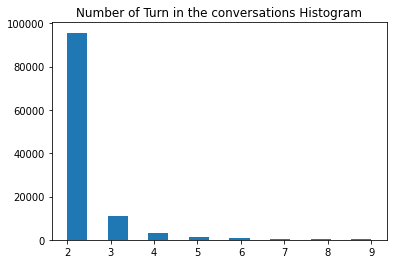

In [49]:
import matplotlib.pyplot as plt
import numpy as np

_ = plt.hist(path_depth, bins=15, range=(2, 9))  # arguments are passed to np.histogram
plt.title("Number of Turn in the conversations Histogram")
plt.show()

In [50]:
# How long a tweet is trendy
import pandas as pd

df_describe = pd.DataFrame(path_depth)
df_describe.describe()

,0
count,112792.000000
mean,2.265524
std,0.818117
min,2.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,10.000000


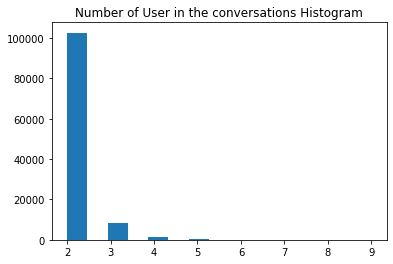

In [51]:
_ = plt.hist(user_count, bins=15, range=(2, 9))  # arguments are passed to np.histogram
plt.title("Number of User in the conversations Histogram")
plt.show()

In [52]:
len(selected_paths)

112792

In [53]:
for path in selected_paths[0:10]:
    print(path)

['1494709112596463623', '1494709377173159936', '1494709755570712577']
['1494666125610995717', '1494689151224250370', '1494689237668884484', '1494689332099416070', '1494697211485368322', '1494698761180037121', '1494700222819504128', '1494700400737665025']
['1494669085770063875', '1494675110963208193', '1494675211332952065']
['1494669085770063875', '1494672044809940994', '1494672276750360576']
['1494663886746042378', '1494724547891064833']
['1494669910798061571', '1494670444192219136']
['1494667726077394947', '1494668050783555588']
['1494635468251488257', '1494640414942707714', '1494644267372847107', '1494644390362742787', '1494644552694583299']
['1494642086246699012', '1494642550279311360', '1494645760893149186']
['1494623928806895618', '1494624355485380608']


# Export for annotations

In [61]:
import random
import re

def htmlspecialchars(text):
    return (
        text.replace("&amp;", "&").
        replace("&quot;", '"').
        replace("&lt;", "<").
        replace("&gt;", ">")
    )

rows = []
for path in selected_paths:
    
    text = []
    userid = {}
    skip = False
    if len(path) <= 2:
        continue
        
    tweets_in_path = []
    for twid in path:
        if twid not in id2tweet:
            skip = True
            break
            
        tweet = id2tweet[twid]
        if tweet is None:
            skip = True
            break
            
        if "author_id" not in tweet:
            # text.append(("unknown", tweet["text"]))
            skip = True
            break
        
        tweets_in_path.append(tweet)
        userid[tweet["author_id"]] = True
        text.append((tweet["author_id"], tweet["text"]))
        
    if skip:
        continue
        
    userid2name = {"unknown":"???"}
    
    if len(userid) > 2:
        continue
        
    for idx, u in enumerate(userid):
        userid2name[u] = chr(ord("A")+idx)
    
    if text[0][0] == text[1][0]: 
        continue
        
    s = ""
    for t in text:
        tt = ' '.join(re.sub("(@[A-Za-z0-9_]+)|(\w+:\/\/\S+)"," ", t[1]).split())
        tt = htmlspecialchars(tt)
        s += f"{userid2name[t[0]]}: {tt}\n\n"
    
#     conv_id = None
#     messages = []
#     for tweet in tweets_in_path:
#         conv_id = tweet["conversation_id"]
#         text = tweet["text"]
#         text = re.sub("(\w+:\/\/\S+)","[URL]", text)
#         text = re.sub("(@[A-Za-z0-9_]+)","[USR]", text)
#         text = htmlspecialchars(text)
        
#         messages.append({
#             "tweet_id": tweet["id"],
#             "user_id": tweet["author_id"],
#             "text": text,
#             "created_at": tweet["created_at"],
#         })
        
    rows.append({
        "text": s,
        "label": [],
#         "conersation_id": conv_id,
#         "messages": messages,
        "tweet": f"https://twitter.com/i/web/status/{path[-1]}"
    })
    
random.Random(41).shuffle(rows)

In [62]:
len(rows)

2907

In [60]:
dump_jsonl("unannotated/v1_unannotated.jsonl", rows, append=False, progress=True)

100%|████████████████████████████████████| 2907/2907 [00:00<00:00, 46591.45it/s]

Wrote 2907 records to v1_unannotated.jsonl


In [57]:
# from tqdm import tqdm

# dump_jsonl(rows, "unannotated/v1_unannotated.jsonl", append=False, progress=True)
# dump_jsonl(rows[0:20], "unannotated/v1_unannotated_p1.jsonl", append=False, progress=True)
# dump_jsonl(rows[20:50], "unannotated/v1_unannotated_p2.jsonl", append=False, progress=True)
# dump_jsonl(rows[50:1050], "unannotated/v1_unannotated_p3.jsonl", append=False, progress=True)


In [58]:
# dump_jsonl(rows[1050:], "unannotated/v1_unannotated_p4.jsonl", append=False, progress=True)